In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble training data.xlsx
/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble testing data.xlsx
/kaggle/input/bgp-ble-rssi-dataset-2/2021/RadioMap.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/CoordinateMap TestPoints.png
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Coordinate  BLE.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/Rute2.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/IMURute1.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/Rute5.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/Rute4.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/IMURute5.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/IMURute3.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/Rute1.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/Rute3.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/IMURute2.csv
/kaggle/input/bgp-ble-rssi-dataset-2/2021/Online Reading/IMURute4.cs

In [2]:
# !pip install torch_geometric
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

import torch
from torch import Tensor
print(torch.__version__)
print(torch.version.cuda)

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__
# os.environ['CUDA'] = torch.version.cuda

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install Localization
!pip install ax-platform

# !pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+cu118.html
# !pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+cu118.html
# !pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}+cu118.html
# !pip install git+https://github.com/pyg-team/pytorch_geometric.git
# !pip install Localization

# !pip install torch_geometric
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

2.0.0+cpu
None
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.1/504.1 kB 17.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/nightly/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 25.1 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-8pzq8ukt
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-8pzq8ukt
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit e1fb0557c9529cbf25d7854107598bf0c9912950
  Installing build dependencies ... - \ done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4

In [3]:
import torch

from ax.service.ax_client import AxClient, ObjectiveProperties
from ax.service.utils.report_utils import exp_to_df
from ax.utils.notebook.plotting import init_notebook_plotting, render
from ax.utils.tutorials.cnn_utils import evaluate, load_mnist, train

import optuna

import torch.nn as nn
import torch.nn.functional as F
from torch._tensor import Tensor
from torch.utils.data import DataLoader

init_notebook_plotting()

[WARNING 08-18 02:39:01] ax.service.utils.with_db_settings_base: Ax currently requires a sqlalchemy version below 2.0. This will be addressed in a future release. Disabling SQL storage in Ax for now, if you would like to use SQL storage please install Ax with mysql extras via `pip install ax-platform[mysql]`.


[INFO 08-18 02:39:02] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn.functional as F
import torch_geometric.datasets as datasets
from torch_geometric.loader import dataloader, LinkLoader
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [5]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1234

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

import torch
torch.manual_seed(seed_value)

torch.cuda.manual_seed(seed_value)

torch.cuda.manual_seed_all(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
# for later versions:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning:

unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning:

file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']



In [6]:
# !pip install GPUtil

# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache()         

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
ax_client = AxClient()

[INFO 08-18 02:39:15] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.


In [8]:
# Create an experiment with required arguments: name, parameters, and objective_name.
ax_client.create_experiment(
    name="tune_cnn_on_mnist",  # The name of the experiment.
    parameters=[
        {
            "name": "lr",  # The name of the parameter.
            "type": "range",  # The type of the parameter ("range", "choice" or "fixed").
            "bounds": [1e-6, 0.4],  # The bounds for range parameters. 
            # "values" The possible values for choice parameters .
            # "value" The fixed value for fixed parameters.
            "value_type": "float",  # Optional, the value type ("int", "float", "bool" or "str"). Defaults to inference from type of "bounds".
            "log_scale": True,  # Optional, whether to use a log scale for range parameters. Defaults to False.
            # "is_ordered" Optional, a flag for choice parameters.
        },
        {
            "name": "momentum",  
            "type": "range",  
            "bounds": [0.0, 1.0],  
        },
    ],
    objectives={"accuracy": ObjectiveProperties(minimize=False)},  # The objective name and minimization setting.
    # parameter_constraints: Optional, a list of strings of form "p1 >= p2" or "p1 + p2 <= some_bound".
    # outcome_constraints: Optional, a list of strings of form "constrained_metric <= some_bound".
)

[INFO 08-18 02:39:15] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 08-18 02:39:15] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='lr', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True), RangeParameter(name='momentum', parameter_type=FLOAT, range=[0.0, 1.0])], parameter_constraints=[]).
[INFO 08-18 02:39:15] ax.modelbridge.dispatch_utils: Using Models.GPEI since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 08-18 02:39:15] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=2 num_trials=None use_batch_trials=False
[INFO 08-18 02:39:15] ax.modelbridge

In [9]:
fingerprint = pd.read_excel('/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble training data.xlsx')
fingerprint = fingerprint.iloc[:, 2:]
max_rssi_val = fingerprint.to_numpy().max()
min_rssi_val = fingerprint.to_numpy().min()

df = pd.read_excel('/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble testing data.xlsx')
df = df.iloc[:, 2:]
max_rssi_val = max(max_rssi_val, df.to_numpy().max())
min_rssi_val = min(min_rssi_val, df.to_numpy().min())

print(max_rssi_val)
print(min_rssi_val)

-27
-98


In [10]:
fingerprint = pd.read_excel('/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble training data.xlsx')
fingerprint = fingerprint.groupby(['X', 'Y']).agg('mean')
fingerprint

Beacon1  Beacon2  Beacon3  Beacon4  Beacon5  Beacon6  Beacon7  \
X    Y                                                                     
0    0      -79.24   -84.70   -84.20   -68.34   -74.82   -81.04   -68.62   
     200    -74.81   -82.34   -81.53   -63.76   -67.97   -81.35   -72.56   
     400    -72.46   -83.70   -80.72   -69.89   -71.24   -87.61   -78.60   
     600    -72.40   -81.00   -83.95   -62.54   -74.50   -88.28   -67.03   
     800    -58.01   -79.16   -83.29   -68.71   -71.61   -76.63   -65.58   
     1000   -67.58   -76.56   -79.82   -66.46   -75.44   -86.36   -61.18   
200  0      -68.31   -80.37   -82.15   -72.62   -73.17   -88.99   -63.15   
     200    -72.80   -75.02   -84.76   -70.41   -70.62   -83.90   -72.58   
     400    -80.64   -76.38   -82.04   -65.77   -71.63   -78.73   -66.13   
     600    -70.00   -72.42   -78.77   -60.72   -76.98   -85.00   -70.58   
     800    -62.46   -73.73   -80.40   -64.97   -74.13   -73.55   -59.03   
     1000   -63.12   -87.43   -83.50   -72.18   -75.06   -84.04   -69.16   
400  0      -76.65   -82.43   -86.00   -66.00   -71.53   -81.66   -61.51   
     200    -70.01   -74.62   -73.13   -70.96   -66.80   -78.05   -71.99   
     400    -66.56   -72.05   -83.20   -53.98   -71.13   -77.16   -71.31   
     600    -71.04   -73.56   -76.17   -63.49   -72.85   -76.78   -65.14   
     800    -57.15   -69.31   -77.00   -68.78   -79.00   -82.14   -62.00   
     1000   -56.40   -73.20   -76.62   -75.60   -70.74   -76.32   -63.88   
600  0      -77.96   -71.80   -72.00   -65.45   -73.60   -83.52   -65.46   
     200    -67.67   -74.52   -78.45   -64.74   -65.45   -82.51   -66.96   
     400    -58.18   -74.35   -78.08   -68.80   -73.53   -75.04   -78.17   
     600    -58.98   -76.31   -74.05   -62.97   -69.76   -77.99   -54.63   
     800    -53.14   -72.50   -86.00   -71.65   -66.60   -81.51   -61.57   
     1000   -60.28   -74.80   -77.04   -76.04   -60.59   -71.02   -60.30   
800  0      -70.72   -71.98   -84.56   -74.01   -69.51   -75.25   -62.00   
     200    -71.23   -66.97   -69.78   -64.68   -61.56   -74.86   -71.44   
     400    -71.61   -72.48   -73.40   -70.28   -61.69   -77.00   -67.00   
     600    -55.33   -69.10   -74.57   -66.84   -69.41   -74.00   -68.17   
     800    -67.78   -68.63   -68.86   -72.17   -63.69   -76.74   -64.37   
     1000   -63.47   -69.83   -74.76   -78.27   -70.14   -76.95   -76.11   
1000 0      -71.32   -71.08   -74.00   -64.16   -70.80   -78.00   -73.51   
     200    -72.12   -74.23   -72.00   -70.12   -69.21   -75.58   -72.40   
     400    -66.70   -74.20   -69.95   -72.00   -60.72   -72.00   -63.04   
     600    -68.99   -65.35   -69.82   -71.60   -54.31   -72.57   -80.34   
     800    -72.00   -64.66   -76.18   -71.13   -58.36   -72.02   -69.95   
     1000   -70.93   -68.85   -69.04   -76.02   -66.27   -69.32   -71.87   
1200 0      -75.72   -77.79   -78.94   -69.18   -66.42   -80.13   -71.17   
     200    -71.34   -73.58   -71.40   -72.00   -70.70   -75.17   -79.11   
     400    -78.66   -64.36   -71.00   -76.00   -67.00   -85.25   -71.40   
     600    -72.00   -56.32   -62.87   -81.24   -65.58   -73.30   -71.72   
     800    -70.58   -63.06   -60.34   -83.00   -62.03   -74.84   -74.94   
     1000   -75.65   -67.00   -60.44   -82.90   -65.67   -61.85   -73.51   
1400 400    -72.21   -61.07   -78.27   -74.11   -71.18   -72.14   -72.27   
     600    -71.16   -63.60   -56.05   -78.14   -70.13   -70.36   -71.35   
     800    -76.83   -64.37   -60.73   -78.26   -67.22   -70.88   -70.03   
     1000   -77.28   -70.60   -56.96   -73.98   -71.00   -63.89   -76.08   
1600 400    -74.50   -61.55   -65.09   -84.45   -76.70   -79.00   -77.25   
     600    -76.97   -59.42   -60.52   -84.30   -74.85   -81.28   -71.58   
     800    -78.00   -68.75   -72.74   -83.44   -67.00   -72.34   -83.36   
     1000   -80.57   -72.90   -68.15   -79.30   -71.65   -63.82   -76.89   
1800 400    -80.10   -63.90   -66.85   -77.22   -67.70   -7

In [11]:
beacon_colname = []

for beacon in fingerprint.columns:
    beacon_colname.append(beacon)

In [12]:
num_rp = len(fingerprint)
num_beacon = len(beacon_colname)

rp = []
x = []
y = []
for i in range(num_rp):
    rp.append(i)
    x.append(fingerprint.index[i][0])
    y.append(fingerprint.index[i][1])

dict = {'rp': rp, 'x': x, 'y': y}
rp_coord = pd.DataFrame(dict)
rp_coord
rp_coord = rp_coord.to_dict()

In [13]:
fingerprint.insert(loc=0, column='rp', value=rp)
fingerprint = fingerprint.reset_index(drop=True)
fingerprint

rp  Beacon1  Beacon2  Beacon3  Beacon4  Beacon5  Beacon6  Beacon7  \
0    0   -79.24   -84.70   -84.20   -68.34   -74.82   -81.04   -68.62   
1    1   -74.81   -82.34   -81.53   -63.76   -67.97   -81.35   -72.56   
2    2   -72.46   -83.70   -80.72   -69.89   -71.24   -87.61   -78.60   
3    3   -72.40   -81.00   -83.95   -62.54   -74.50   -88.28   -67.03   
4    4   -58.01   -79.16   -83.29   -68.71   -71.61   -76.63   -65.58   
5    5   -67.58   -76.56   -79.82   -66.46   -75.44   -86.36   -61.18   
6    6   -68.31   -80.37   -82.15   -72.62   -73.17   -88.99   -63.15   
7    7   -72.80   -75.02   -84.76   -70.41   -70.62   -83.90   -72.58   
8    8   -80.64   -76.38   -82.04   -65.77   -71.63   -78.73   -66.13   
9    9   -70.00   -72.42   -78.77   -60.72   -76.98   -85.00   -70.58   
10  10   -62.46   -73.73   -80.40   -64.97   -74.13   -73.55   -59.03   
11  11   -63.12   -87.43   -83.50   -72.18   -75.06   -84.04   -69.16   
12  12   -76.65   -82.43   -86.00   -66.00   -71.53   -81.66   -61.51   
13  13   -70.01   -74.62   -73.13   -70.96   -66.80   -78.05   -71.99   
14  14   -66.56   -72.05   -83.20   -53.98   -71.13   -77.16   -71.31   
15  15   -71.04   -73.56   -76.17   -63.49   -72.85   -76.78   -65.14   
16  16   -57.15   -69.31   -77.00   -68.78   -79.00   -82.14   -62.00   
17  17   -56.40   -73.20   -76.62   -75.60   -70.74   -76.32   -63.88   
18  18   -77.96   -71.80   -72.00   -65.45   -73.60   -83.52   -65.46   
19  19   -67.67   -74.52   -78.45   -64.74   -65.45   -82.51   -66.96   
20  20   -58.18   -74.35   -78.08   -68.80   -73.53   -75.04   -78.17   
21  21   -58.98   -76.31   -74.05   -62.97   -69.76   -77.99   -54.63   
22  22   -53.14   -72.50   -86.00   -71.65   -66.60   -81.51   -61.57   
23  23   -60.28   -74.80   -77.04   -76.04   -60.59   -71.02   -60.30   
24  24   -70.72   -71.98   -84.56   -74.01   -69.51   -75.25   -62.00   
25  25   -71.23   -66.97   -69.78   -64.68   -61.56   -74.86   -71.44   
26  26   -71.61   -72.48   -73.40   -70.28   -61.69   -77.00   -67.00   
27  27   -55.33   -69.10   -74.57   -66.84   -69.41   -74.00   -68.17   
28  28   -67.78   -68.63   -68.86   -72.17   -63.69   -76.74   -64.37   
29  29   -63.47   -69.83   -74.76   -78.27   -70.14   -76.95   -76.11   
30  30   -71.32   -71.08   -74.00   -64.16   -70.80   -78.00   -73.51   
31  31   -72.12   -74.23   -72.00   -70.12   -69.21   -75.58   -72.40   
32  32   -66.70   -74.20   -69.95   -72.00   -60.72   -72.00   -63.04   
33  33   -68.99   -65.35   -69.82   -71.60   -54.31   -72.57   -80.34   
34  34   -72.00   -64.66   -76.18   -71.13   -58.36   -72.02   -69.95   
35  35   -70.93   -68.85   -69.04   -76.02   -66.27   -69.32   -71.87   
36  36   -75.72   -77.79   -78.94   -69.18   -66.42   -80.13   -71.17   
37  37   -71.34   -73.58   -71.40   -72.00   -70.70   -75.17   -79.11   
38  38   -78.66   -64.36   -71.00   -76.00   -67.00   -85.25   -71.40   
39  39   -72.00   -56.32   -62.87   -81.24   -65.58   -73.30   -71.72   
40  40   -70.58   -63.06   -60.34   -83.00   -62.03   -74.84   -74.94   
41  41   -75.65   -67.00   -60.44   -82.90   -65.67   -61.85   -73.51   
42  42   -72.21   -61.07   -78.27   -74.11   -71.18   -72.14   -72.27   
43  43   -71.16   -63.60   -56.05   -78.14   -70.13   -70.36   -71.35   
44  44   -76.83   -64.37   -60.73   -78.26   -67.22   -70.88   -70.03   
45  45   -77.28   -70.60   -56.96   -73.98   -71.00   -63.89   -76.08   
46  46   -74.50   -61.55   -65.09   -84.45   -76.70   -79.00   -77.25   
47  47   -76.97   -59.42   -60.52   -84.30   -74.85   -81.28   -71.58   
48  48   -78.00   -68.75   -72.74   -83.44   -67.00   -72.34   -83.36   
49  49   -80.57   -72.90   -68.15   -79.30   -71.65   -63.82   -76.89   
50  50   -80.10   -63.90   -66.85   -77.22   -67.70   -75.26   -81.56   
51  51   -78.30   -68.38   -68.87   -74.48   -70.17   -79.82   -72.30   
52  52   -78.14   -65.24   -74.00   -81.15   -69.18   -71.37   -71.25   
53  53   -89.00   -66.73   -65.47   -82.00   -77.00   -71.76  

In [14]:
eps = 1e-6
threshold = 0.1

def euc(x1, y1, x2, y2):
    ret = np.sqrt(((x1 - x2) ** 2) + ((y1 - y2) ** 2))
    return ret

def euc_rp(a, b):
    a = [rp_coord['x'][a], rp_coord['y'][a]]
    b = [rp_coord['x'][b], rp_coord['y'][b]]
    ret = np.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))
    return ret

def euc_rssi(a, b):
    ret = 0.0
    for i in range(len(a)):
        ret += (a[i] - b[i]) * (a[i] - b[i])
    
    ret = np.sqrt(ret)
    return ret

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def normalize_torch(x):
    sigma = torch.sum(x)
    for i in range(len(x)):
        x[i] = x[i] / sigma
        
    return x

def normalize_rssi(x):
    for beacon in beacon_colname:
        x[beacon] = (x[beacon] + (-1 * min_rssi_val)) / (max_rssi_val - min_rssi_val)
    
    return x

In [15]:
rp_boundaries = [0, 1, 2, 3, 4, 5,
           11, 17, 23, 29, 35, 41, 45, 49, 53,
           52, 51, 50,
           46, 42,
           38, 37, 36,
           30, 24, 18, 12, 6]

rp_edge = [1, 2, 3, 4,
          11, 17, 23, 29, 35, 41, 45, 49,
          52, 51,
          46,
          30, 24, 18, 12, 6]

convex_node = [0, 5, 53, 50, 36]

concav_node = [38]

special = [42, 37]

n_neighbours = 8
edge_n_neighbours = 5
convex_n_neighbours = 3
concav_n_neighbours = 7

In [16]:
df = pd.read_excel('/kaggle/input/bgp-ble-rssi-dataset-2/2019/ble testing data.xlsx')
df

X    Y  Beacon1  Beacon2  Beacon3  Beacon4  Beacon5  Beacon6  \
0       50   50      -73      -72      -89      -68      -78      -89   
1       50   50      -73      -78      -82      -68      -70      -89   
2       50   50      -73      -78      -82      -68      -70      -89   
3       50   50      -73      -78      -82      -68      -70      -89   
4       50   50      -73      -78      -82      -68      -70      -89   
...    ...  ...      ...      ...      ...      ...      ...      ...   
1555  1750  950      -79      -78      -62      -72      -68      -72   
1556  1750  950      -79      -78      -62      -72      -68      -72   
1557  1750  950      -79      -78      -62      -72      -68      -72   
1558  1750  950      -79      -78      -62      -72      -68      -72   
1559  1750  950      -79      -78      -62      -72      -68      -72   

      Beacon7  Beacon8  ...  Beacon15  Beacon16  Beacon17  Beacon18  Beacon19  \
0         -65      -84  ...       -69       -70       -77       -72       -84   
1         -65      -84  ...       -69       -70       -77       -72       -87   
2         -65      -84  ...       -69       -70       -77       -72       -87   
3         -65      -84  ...       -69       -70       -77       -72       -87   
4         -65      -84  ...       -69       -70       -77       -72       -87   
...       ...      ...  ...       ...       ...       ...       ...       ...   
1555      -80      -74  ...       -80       -77       -78       -90       -77   
1556      -80      -74  ...       -80       -77       -78       -90       -77   
1557      -80      -74  ...       -80       -77       -78       -90       -77   
1558      -80      -74  ...       -80       -77       -78       -90       -77   
1559      -80      -74  ...       -80       -77       -78       -90       -77   

      Beacon20  Beacon21  Beacon22  Beacon23  Beacon24   
0          -81       -92       -80       -74        -83  
1          -81       -92       -80       -74        -83  
2          -81       -92       -80       -74        -83  
3          -81       -92       -80       -74        -83  
4          -81       -92       -80       -74        -83  
...        ...       ...       ...       ...        ...  
1555       -82       -63       -72       -61        -64  
1556       -82       -63       -72       -61        -64  
1557       -82       -63       -72       -61        -64  
1558       -82       -63       -72       -61        -64  
1559       -82       -63       -72       -61        -64  

[1560 rows x 26 columns]

In [17]:
coarse_x = []
coarse_y = []

for i in range(len(df)):
    fp_weight = []
    sum_weight = 0.0
    tp_feature = df.iloc[i, 2: 2 + num_beacon].to_numpy()
    for rp in rp_boundaries:
        rp_feature = fingerprint.iloc[rp, -num_beacon: ].to_numpy()
        dist = 100.0 / euc_rssi(tp_feature, rp_feature)
        fp_weight.append(dist)
        sum_weight += dist
        
    fp_weight /= sum_weight
    
    pred_x = 0.0
    pred_y = 0.0
    
    idx = 0
    
    for rp in rp_boundaries:
        x = rp_coord['x'][rp]
        y = rp_coord['y'][rp]
        
        pred_x += fp_weight[idx] * x
        pred_y += fp_weight[idx] * y
        idx += 1
    
    coarse_x.append(pred_x)
    coarse_y.append(pred_y)

df['coarse_X'] = coarse_x
df['coarse_Y'] = coarse_y

In [18]:
fingerprint = normalize_rssi(fingerprint)
df = normalize_rssi(df)

In [19]:
fingerprint

rp   Beacon1   Beacon2   Beacon3   Beacon4   Beacon5   Beacon6   Beacon7  \
0    0  0.264225  0.187324  0.194366  0.417746  0.326479  0.238873  0.413803   
1    1  0.326620  0.220563  0.231972  0.482254  0.422958  0.234507  0.358310   
2    2  0.359718  0.201408  0.243380  0.395915  0.376901  0.146338  0.273239   
3    3  0.360563  0.239437  0.197887  0.499437  0.330986  0.136901  0.436197   
4    4  0.563239  0.265352  0.207183  0.412535  0.371690  0.300986  0.456620   
5    5  0.428451  0.301972  0.256056  0.444225  0.317746  0.163944  0.518592   
6    6  0.418169  0.248310  0.223239  0.357465  0.349718  0.126901  0.490845   
7    7  0.354930  0.323662  0.186479  0.388592  0.385634  0.198592  0.358028   
8    8  0.244507  0.304507  0.224789  0.453944  0.371408  0.271408  0.448873   
9    9  0.394366  0.360282  0.270845  0.525070  0.296056  0.183099  0.386197   
10  10  0.500563  0.341831  0.247887  0.465211  0.336197  0.344366  0.548873   
11  11  0.491268  0.148873  0.204225  0.363662  0.323099  0.196620  0.406197   
12  12  0.300704  0.219296  0.169014  0.450704  0.372817  0.230141  0.513944   
13  13  0.394225  0.329296  0.350282  0.380845  0.439437  0.280986  0.366338   
14  14  0.442817  0.365493  0.208451  0.620000  0.378451  0.293521  0.375915   
15  15  0.379718  0.344225  0.307465  0.486056  0.354225  0.298873  0.462817   
16  16  0.575352  0.404085  0.295775  0.411549  0.267606  0.223380  0.507042   
17  17  0.585915  0.349296  0.301127  0.315493  0.383944  0.305352  0.480563   
18  18  0.282254  0.369014  0.366197  0.458451  0.343662  0.203944  0.458310   
19  19  0.427183  0.330704  0.275352  0.468451  0.458451  0.218169  0.437183   
20  20  0.560845  0.333099  0.280563  0.411268  0.344648  0.323380  0.279296   
21  21  0.549577  0.305493  0.337324  0.493380  0.397746  0.281831  0.610845   
22  22  0.631831  0.359155  0.169014  0.371127  0.442254  0.232254  0.513099   
23  23  0.531268  0.326761  0.295211  0.309296  0.526901  0.380000  0.530986   
24  24  0.384225  0.366479  0.189296  0.337887  0.401268  0.320423  0.507042   
25  25  0.377042  0.437042  0.397465  0.469296  0.513239  0.325915  0.374085   
26  26  0.371690  0.359437  0.346479  0.390423  0.511408  0.295775  0.436620   
27  27  0.600986  0.407042  0.330000  0.438873  0.402676  0.338028  0.420141   
28  28  0.425634  0.413662  0.410423  0.363803  0.483239  0.299437  0.473662   
29  29  0.486338  0.396761  0.327324  0.277887  0.392394  0.296479  0.308310   
30  30  0.375775  0.379155  0.338028  0.476620  0.383099  0.281690  0.344930   
31  31  0.364507  0.334789  0.366197  0.392676  0.405493  0.315775  0.360563   
32  32  0.440845  0.335211  0.395070  0.366197  0.525070  0.366197  0.492394   
33  33  0.408592  0.459859  0.396901  0.371831  0.615352  0.358169  0.248732   
34  34  0.366197  0.469577  0.307324  0.378451  0.558310  0.365915  0.395070   
35  35  0.381268  0.410563  0.407887  0.309577  0.446901  0.403944  0.368028   
36  36  0.313803  0.284648  0.268451  0.405915  0.444789  0.251690  0.377887   
37  37  0.375493  0.343944  0.374648  0.366197  0.384507  0.321549  0.266056   
38  38  0.272394  0.473803  0.380282  0.309859  0.436620  0.179577  0.374648   
39  39  0.366197  0.587042  0.494789  0.236056  0.456620  0.347887  0.370141   
40  40  0.386197  0.492113  0.530423  0.211268  0.506620  0.326197  0.324789   
41  41  0.314789  0.436620  0.529014  0.212676  0.455352  0.509155  0.344930   
42  42  0.363239  0.520141  0.277887  0.336479  0.377746  0.364225  0.362394   
43  43  0.378028  0.484507  0.590845  0.279718  0.392535  0.389296  0.375352   
44  44  0.298169  0.473662  0.524930  0.278028  0.433521  0.381972  0.393944   
45  45  0.291831  0.385915  0.578028  0.338310  0.380282  0.480423  0.308732   
46  46  0.330986  0.513380  0.463521  0.190845  0.300000  0.267606  0.292254   
47  47  0.296197  0.543380  0.527887  0.192958  0.326056  0.235493  0.372113   
48  48  0.281690  0.411972  0.355775  0.205070  0.436620  0.361408  0.206197   
49  

In [20]:
df

X    Y   Beacon1   Beacon2   Beacon3   Beacon4   Beacon5   Beacon6  \
0       50   50  0.352113  0.366197  0.126761  0.422535  0.281690  0.126761   
1       50   50  0.352113  0.281690  0.225352  0.422535  0.394366  0.126761   
2       50   50  0.352113  0.281690  0.225352  0.422535  0.394366  0.126761   
3       50   50  0.352113  0.281690  0.225352  0.422535  0.394366  0.126761   
4       50   50  0.352113  0.281690  0.225352  0.422535  0.394366  0.126761   
...    ...  ...       ...       ...       ...       ...       ...       ...   
1555  1750  950  0.267606  0.281690  0.507042  0.366197  0.422535  0.366197   
1556  1750  950  0.267606  0.281690  0.507042  0.366197  0.422535  0.366197   
1557  1750  950  0.267606  0.281690  0.507042  0.366197  0.422535  0.366197   
1558  1750  950  0.267606  0.281690  0.507042  0.366197  0.422535  0.366197   
1559  1750  950  0.267606  0.281690  0.507042  0.366197  0.422535  0.366197   

       Beacon7   Beacon8  ...  Beacon17  Beacon18  Beacon19  Beacon20  \
0     0.464789  0.197183  ...  0.295775  0.366197  0.197183  0.239437   
1     0.464789  0.197183  ...  0.295775  0.366197  0.154930  0.239437   
2     0.464789  0.197183  ...  0.295775  0.366197  0.154930  0.239437   
3     0.464789  0.197183  ...  0.295775  0.366197  0.154930  0.239437   
4     0.464789  0.197183  ...  0.295775  0.366197  0.154930  0.239437   
...        ...       ...  ...       ...       ...       ...       ...   
1555  0.253521  0.338028  ...  0.281690  0.112676  0.295775  0.225352   
1556  0.253521  0.338028  ...  0.281690  0.112676  0.295775  0.225352   
1557  0.253521  0.338028  ...  0.281690  0.112676  0.295775  0.225352   
1558  0.253521  0.338028  ...  0.281690  0.112676  0.295775  0.225352   
1559  0.253521  0.338028  ...  0.281690  0.112676  0.295775  0.225352   

      Beacon21  Beacon22  Beacon23  Beacon24      coarse_X    coarse_Y  
0     0.084507  0.253521  0.338028   0.211268   694.508415  490.935799  
1     0.084507  0.253521  0.338028   0.211268   737.246648  504.513746  
2     0.084507  0.253521  0.338028   0.211268   737.246648  504.513746  
3     0.084507  0.253521  0.338028   0.211268   737.246648  504.513746  
4     0.084507  0.253521  0.338028   0.211268   737.246648  504.513746  
...        ...       ...       ...        ...          ...         ...  
1555  0.492958  0.366197  0.521127   0.478873  1040.922549  568.463216  
1556  0.492958  0.366197  0.521127   0.478873  1040.922549  568.463216  
1557  0.492958  0.366197  0.521127   0.478873  1040.922549  568.463216  
1558  0.492958  0.366197  0.521127   0.478873  1040.922549  568.463216  
1559  0.492958  0.366197  0.521127   0.478873  1040.922549  568.463216  

[1560 rows x 28 columns]

In [21]:
df['XY'] = df.apply(lambda row: (row['X'], row['Y']), axis=1)
# df = scale_df(df)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# X_temp1, X_temp2, y_temp1, y_temp2 = train_test_split(X, y, test_size=624, random_state=seed_value, stratify=y)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=260, random_state=seed_value, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=260, random_state=seed_value, stratify=y_temp)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train

X    Y   Beacon1   Beacon2   Beacon3   Beacon4   Beacon5   Beacon6  \
0      450   50  0.338028  0.450704  0.295775  0.422535  0.521127  0.197183   
1      550  250  0.352113  0.366197  0.422535  0.366197  0.549296  0.338028   
2     1350  850  0.352113  0.521127  0.676056  0.281690  0.380282  0.591549   
3     1750  650  0.239437  0.366197  0.422535  0.253521  0.408451  0.366197   
4      750  150  0.338028  0.394366  0.492958  0.464789  0.366197  0.169014   
...    ...  ...       ...       ...       ...       ...       ...       ...   
1035  1050  750  0.394366  0.577465  0.450704  0.338028  0.619718  0.380282   
1036  1250  650  0.380282  0.478873  0.563380  0.352113  0.366197  0.338028   
1037   950   50  0.366197  0.422535  0.239437  0.450704  0.366197  0.295775   
1038   650  750  0.366197  0.338028  0.464789  0.436620  0.492958  0.154930   
1039  1150   50  0.295775  0.394366  0.323944  0.394366  0.422535  0.366197   

       Beacon7   Beacon8  ...  Beacon17  Beacon18  Beacon19  Beacon20  \
0     0.281690  0.239437  ...  0.295775  0.338028  0.366197  0.295775   
1     0.535211  0.422535  ...  0.183099  0.394366  0.323944  0.450704   
2     0.380282  0.436620  ...  0.225352  0.070423  0.323944  0.028169   
3     0.323944  0.239437  ...  0.000000  0.070423  0.154930  0.126761   
4     0.394366  0.338028  ...  0.436620  0.253521  0.394366  0.507042   
...        ...       ...  ...       ...       ...       ...       ...   
1035  0.464789  0.450704  ...  0.225352  0.295775  0.436620  0.422535   
1036  0.422535  0.366197  ...  0.211268  0.169014  0.450704  0.352113   
1037  0.450704  0.338028  ...  0.295775  0.352113  0.380282  0.436620   
1038  0.605634  0.507042  ...  0.366197  0.380282  0.154930  0.352113   
1039  0.253521  0.366197  ...  0.197183  0.225352  0.394366  0.394366   

      Beacon21  Beacon22  Beacon23  Beacon24     coarse_X    coarse_Y  
0     0.154930  0.352113  0.338028   0.112676  801.414748  509.845131  
1     0.338028  0.422535  0.239437   0.366197  839.232314  508.392618  
2     0.338028  0.394366  0.450704   0.436620  992.149769  578.735486  
3     0.211268  0.492958  0.521127   0.732394  986.429007  537.741255  
4     0.267606  0.422535  0.267606   0.380282  854.871173  494.134790  
...        ...       ...       ...        ...         ...         ...  
1035  0.295775  0.394366  0.281690   0.323944  922.271438  541.680180  
1036  0.352113  0.422535  0.295775   0.366197  951.599856  536.717382  
1037  0.112676  0.422535  0.267606   0.436620  857.273079  488.093740  
1038  0.154930  0.380282  0.225352   0.295775  808.738446  534.342300  
1039  0.211268  0.352113  0.323944   0.394366  906.231936  487.941169  

[1040 rows x 28 columns]

In [23]:
k = 4
tp = num_rp

rps = np.zeros(num_rp)
for i in range(num_rp):
    rps[i] = i

src = []
for i in range(num_rp):
    for j in range(k):
        src.append(i)
            
src = np.array(src)

dst = np.zeros(len(src))
for i in range(len(src)):
    temp = src[i]
    while(temp == src[i] or temp in rp_boundaries):
        temp = np.random.randint(num_rp)
    dst[i] = temp
    
temp = dst
    
dst = np.concatenate((dst, src), axis=None)
src = np.concatenate((src, temp), axis=None)

additional_src = np.zeros(len(rp_boundaries))
additional_dst = np.zeros(len(rp_boundaries))

for j in range(len(additional_src)):
    additional_src[j] = tp

for j in range(len(additional_dst)):
    additional_dst[j] = rp_boundaries[j]

temp = additional_dst

additional_dst = np.concatenate((additional_dst, additional_src), axis=None)
additional_src = np.concatenate((additional_src, temp), axis=None)

src = np.concatenate((src, additional_src), axis=None)
dst = np.concatenate((dst, additional_dst), axis=None)

for i in range(num_rp + 1):
    src = np.append(src, i)
    dst = np.append(dst, i)
    
src = src.astype(int)
dst = dst.astype(int)
additional_src = additional_src.astype(int)
additional_dst = additional_dst.astype(int)
additional_src = additional_src[:len(rp_boundaries)]
additional_dst = additional_dst[:len(rp_boundaries)]

# base_edge_weight = []
# sum_neighbour_weight = np.zeros(num_rp)
# for i in range(len(src)):
#     x1 = rp_coord['x'][src[i]]
#     y1 = rp_coord['y'][src[i]]
#     x2 = rp_coord['x'][dst[i]]
#     y2 = rp_coord['y'][dst[i]]
    
#     weight = 100.0 / euc(x1, y1, x2, y2)
#     base_edge_weight.append(weight)
#     sum_neighbour_weight[int(src[i])] += weight
    
# for i in range(num_rp):
#     src = np.append(src, i)
#     dst = np.append(dst, i)
#     base_edge_weight = np.append(base_edge_weight, sum_neighbour_weight[i])
    
base_x = fingerprint.iloc[:,-num_beacon:].to_numpy()
base_x = torch.FloatTensor(base_x)
# base_edge_index = torch.tensor([src, dst])
# base_edge_weight = torch.tensor(base_edge_weight)
# base_edge_weight = base_edge_weight.double()
edge_label_index = torch.tensor([additional_src, additional_dst])

/tmp/ipykernel_20/914402044.py:77: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)



In [24]:
import torch_geometric.data as data
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.sampler import (
    BaseSampler,
    EdgeSamplerInput,
    HeteroSamplerOutput,
    NegativeSampling,
    SamplerOutput,
)

train_data_list = []
train_linkloader_list = []
tp = num_rp

for i in tqdm(range(len(X_train))):
    additional_x = X_train.iloc[i, 2: -2].to_numpy()    
    additional_x = torch.FloatTensor(additional_x)
    additional_x = torch.reshape(additional_x, (1, len(additional_x)))

    x = torch.cat((base_x, additional_x), 0)
    
    edge_index = torch.tensor([src, dst])
    
    edge_weight = []
    edge_label = []
    sum_neighbour_weight = np.zeros(num_rp + 1)
    for j in range(len(src) - (num_rp + 1)):
        if(src[j] == tp and dst[j] == tp):
            x1 = X_train.iloc[i, -2]
            y1 = X_train.iloc[i, -1]
            x2 = X_train.iloc[i, -2]
            y2 = X_train.iloc[i, -1]
        elif(src[j] == tp):
            x1 = X_train.iloc[i, -2]
            y1 = X_train.iloc[i, -1]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
        elif(dst[j] == tp):
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = X_train.iloc[i, -2]
            y2 = X_train.iloc[i, -1]
        else:
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
            
        weight = 100.0 / euc(x1, y1, x2, y2)
        edge_weight.append(weight)
        sum_neighbour_weight[int(src[j])] += weight
        
    for j in range(edge_label_index.shape[1]):
        if(additional_src[j] == tp and additional_dst[j] == tp):
            x1 = X_train.iloc[i, 0]
            y1 = X_train.iloc[i, 1]
            x2 = X_train.iloc[i, 0]
            y2 = X_train.iloc[i, 1]
        elif(additional_src[j] == tp):
            x1 = X_train.iloc[i, 0]
            y1 = X_train.iloc[i, 1]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        elif(additional_dst[j] == tp):
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = X_train.iloc[i, 0]
            y2 = X_train.iloc[i, 1]
        else:
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        
        dist = euc(x1, y1, x2, y2)
        edge_label.append(dist)
        
    for j in range(num_rp + 1):
        edge_weight.append(sum_neighbour_weight[j])
        
    edge_label = torch.tensor(edge_label)
    edge_label = edge_label.double()
        
    edge_weight = torch.tensor(edge_weight)
    edge_weight = edge_weight.double()
    
    edge_index = edge_index.to(torch.int64)
    edge_label_index = edge_label_index.to(torch.int64)
    
    graph = data.Data(x=x, edge_index=edge_index, edge_weight=edge_weight)
    train_loader = LinkNeighborLoader(graph, num_neighbors=[-1] * (num_rp + 1), batch_size=len(edge_label), edge_label_index=edge_label_index, edge_label=edge_label)
    
    train_data_list.append(graph)
    train_linkloader_list.append(train_loader)

100%|██████████| 1040/1040 [00:13<00:00, 75.57it/s]


In [25]:
import torch_geometric.data as data
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.sampler import (
    BaseSampler,
    EdgeSamplerInput,
    HeteroSamplerOutput,
    NegativeSampling,
    SamplerOutput,
)

val_data_list = []
val_linkloader_list = []
tp = num_rp

for i in tqdm(range(len(X_val))):
    additional_x = X_val.iloc[i, 2: -2].to_numpy()    
    additional_x = torch.FloatTensor(additional_x)
    additional_x = torch.reshape(additional_x, (1, len(additional_x)))

    x = torch.cat((base_x, additional_x), 0)
    
    edge_index = torch.tensor([src, dst])
    
    edge_weight = []
    edge_label = []
    sum_neighbour_weight = np.zeros(num_rp + 1)
    for j in range(len(src) - (num_rp + 1)):
        if(src[j] == tp and dst[j] == tp):
            x1 = X_val.iloc[i, -2]
            y1 = X_val.iloc[i, -1]
            x2 = X_val.iloc[i, -2]
            y2 = X_val.iloc[i, -1]
        elif(src[j] == tp):
            x1 = X_val.iloc[i, -2]
            y1 = X_val.iloc[i, -1]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
        elif(dst[j] == tp):
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = X_val.iloc[i, -2]
            y2 = X_val.iloc[i, -1]
        else:
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
            
        weight = 100.0 / euc(x1, y1, x2, y2)
        edge_weight.append(weight)
        sum_neighbour_weight[int(src[j])] += weight
        
    for j in range(edge_label_index.shape[1]):
        if(additional_src[j] == tp and additional_dst[j] == tp):
            x1 = X_val.iloc[i, 0]
            y1 = X_val.iloc[i, 1]
            x2 = X_val.iloc[i, 0]
            y2 = X_val.iloc[i, 1]
        elif(additional_src[j] == tp):
            x1 = X_val.iloc[i, 0]
            y1 = X_val.iloc[i, 1]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        elif(additional_dst[j] == tp):
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = X_val.iloc[i, 0]
            y2 = X_val.iloc[i, 1]
        else:
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        
        dist = euc(x1, y1, x2, y2)
        edge_label.append(dist)
        
    for j in range(num_rp + 1):
        edge_weight.append(sum_neighbour_weight[j])
        
    edge_label = torch.tensor(edge_label)
    edge_label = edge_label.double()
        
    edge_weight = torch.tensor(edge_weight)
    edge_weight = edge_weight.double()
    
    edge_index = edge_index.to(torch.int64)
    edge_label_index = edge_label_index.to(torch.int64)
    
    graph = data.Data(x=x, edge_index=edge_index, edge_weight=edge_weight)
    val_loader = LinkNeighborLoader(graph, num_neighbors=[-1] * (num_rp + 1), batch_size=len(edge_label), edge_label_index=edge_label_index, edge_label=edge_label)

    val_data_list.append(graph)
    val_linkloader_list.append(val_loader)

100%|██████████| 260/260 [00:03<00:00, 76.74it/s]


In [26]:
import torch_geometric.data as data
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.sampler import (
    BaseSampler,
    EdgeSamplerInput,
    HeteroSamplerOutput,
    NegativeSampling,
    SamplerOutput,
)

test_data_list = []
test_linkloader_list = []
tp = num_rp

test_edge_label = []
test_edge_label_index = []

for i in tqdm(range(len(X_test))):
    additional_x = X_test.iloc[i, 2: -2].to_numpy()    
    additional_x = torch.FloatTensor(additional_x)
    additional_x = torch.reshape(additional_x, (1, len(additional_x)))

    x = torch.cat((base_x, additional_x), 0)
    
    edge_index = torch.tensor([src, dst])
    
    edge_weight = []
    edge_label = []
    sum_neighbour_weight = np.zeros(num_rp + 1)
    for j in range(len(src) - (num_rp + 1)):
        if(src[j] == tp and dst[j] == tp):
            x1 = X_test.iloc[i, -2]
            y1 = X_test.iloc[i, -1]
            x2 = X_test.iloc[i, -2]
            y2 = X_test.iloc[i, -1]
        elif(src[j] == tp):
            x1 = X_test.iloc[i, -2]
            y1 = X_test.iloc[i, -1]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
        elif(dst[j] == tp):
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = X_test.iloc[i, -2]
            y2 = X_test.iloc[i, -1]
        else:
            x1 = rp_coord['x'][src[j]]
            y1 = rp_coord['y'][src[j]]
            x2 = rp_coord['x'][dst[j]]
            y2 = rp_coord['y'][dst[j]]
            
        weight = 100.0 / euc(x1, y1, x2, y2)
        edge_weight.append(weight)
        sum_neighbour_weight[int(src[j])] += weight
    
    for j in range(edge_label_index.shape[1]):
        if(additional_src[j] == tp and additional_dst[j] == tp):
            x1 = X_test.iloc[i, 0]
            y1 = X_test.iloc[i, 1]
            x2 = X_test.iloc[i, 0]
            y2 = X_test.iloc[i, 1]
        elif(additional_src[j] == tp):
            x1 = X_test.iloc[i, 0]
            y1 = X_test.iloc[i, 1]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        elif(additional_dst[j] == tp):
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = X_test.iloc[i, 0]
            y2 = X_test.iloc[i, 1]
        else:
            x1 = rp_coord['x'][additional_src[j]]
            y1 = rp_coord['y'][additional_src[j]]
            x2 = rp_coord['x'][additional_dst[j]]
            y2 = rp_coord['y'][additional_dst[j]]
        
        dist = euc(x1, y1, x2, y2)
        edge_label.append(dist)
        
    for j in range(num_rp + 1):
        edge_weight.append(sum_neighbour_weight[j])
        
    edge_label = torch.tensor(edge_label)
    edge_label = edge_label.double()
        
    edge_weight = torch.tensor(edge_weight)
    edge_weight = edge_weight.double()
    
    edge_index = edge_index.to(torch.int64)
    edge_label_index = edge_label_index.to(torch.int64)
    
    test_edge_label.append(edge_label)
    test_edge_label_index.append(edge_label_index)
    
    graph = data.Data(x=x, edge_index=edge_index, edge_weight=edge_weight)
    test_loader = LinkNeighborLoader(graph, num_neighbors=[-1] * (num_rp + 1), batch_size=len(edge_label), edge_label_index=edge_label_index, edge_label=edge_label)

    test_data_list.append(graph)
    test_linkloader_list.append(test_loader)

100%|██████████| 260/260 [00:03<00:00, 76.39it/s]


In [27]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

# GraphSAGE with edge_weight, edge decoder concatenation / substraction

In [28]:
# from torch_geometric.nn import SAGEConv, GCNConv, to_hetero

# class GNNEncoder(torch.nn.Module):
#     def __init__(self, hidden_channels, out_channels):
#         super().__init__()
#         self.conv1 = SAGEConv((-1, -1), hidden_channels)
#         self.conv2 = SAGEConv((-1, -1), out_channels)

#     def forward(self, x, edge_index, edge_weight):
#         x = self.conv1(x, edge_index, edge_weight).relu()
#         x = self.conv2(x, edge_index, edge_weight)
#         return x


# class EdgeDecoder(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
# #         self.lin1 = torch.nn.Linear(2 * hidden_channels, hidden_channels)
#         self.lin1 = torch.nn.Linear(hidden_channels, hidden_channels)
#         self.lin2 = torch.nn.Linear(hidden_channels, 1)

#     def forward(self, z_dict, edge_label_index):
#         row, col = edge_label_index
# #         z = torch.cat([z_dict[row], z_dict[col]], dim=-1)
#         z = torch.sub(z_dict[row], z_dict[col])

#         z = self.lin1(z).relu()
#         z = self.lin2(z)
#         return z.view(-1)


# class Model(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
#         self.encoder = GNNEncoder(hidden_channels, hidden_channels)
# #         self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
#         self.decoder = EdgeDecoder(hidden_channels)

#     def forward(self, x_dict, edge_index_dict, edge_weight, edge_label_index):
#         z_dict = self.encoder(x_dict, edge_index_dict, edge_weight)
#         return self.decoder(z_dict, edge_label_index)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = Model(hidden_channels=64).to(device)

# print(model)

# GCN with edge_weight, edge decoder concatenation / substraction

In [29]:
from torch_geometric.nn import SAGEConv, GCNConv, to_hetero

class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(num_beacon, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight):
        x = x.double()
        x = self.conv1(x, edge_index, edge_weight.double()).relu()
        x = x.double()
        x = self.conv2(x, edge_index, edge_weight.double())
        return x


class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
#         self.lin1 = torch.nn.Linear(2 * hidden_channels, hidden_channels)
        self.lin1 = torch.nn.Linear(hidden_channels, hidden_channels)
        self.lin2 = torch.nn.Linear(hidden_channels, 1)

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
#         z = torch.cat([z_dict[row], z_dict[col]], dim=-1)
        z = torch.sub(z_dict[row], z_dict[col])

        z = self.lin1(z).relu()
        z = self.lin2(z)
        return z.view(-1)


class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels, hidden_channels)
#         self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
        self.decoder = EdgeDecoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_weight, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict, edge_weight)
        return self.decoder(z_dict, edge_label_index)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model(hidden_channels=64).to(device)

print(model)

Model(
  (encoder): GNNEncoder(
    (conv1): GCNConv(24, 64)
    (conv2): GCNConv(64, 64)
  )
  (decoder): EdgeDecoder(
    (lin1): Linear(in_features=64, out_features=64, bias=True)
    (lin2): Linear(in_features=64, out_features=1, bias=True)
  )
)


# GraphSAGE, edge decoder concatenation / substraction

In [30]:
# from torch_geometric.nn import SAGEConv, GCNConv, to_hetero

# class GNNEncoder(torch.nn.Module):
#     def __init__(self, hidden_channels, out_channels):
#         super().__init__()
#         self.conv1 = SAGEConv((-1, -1), hidden_channels)
#         self.conv2 = SAGEConv((-1, -1), out_channels)

#     def forward(self, x, edge_index):
#         x = self.conv1(x, edge_index).relu()
#         x = self.conv2(x, edge_index)
#         return x


# class EdgeDecoder(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
# #         self.lin1 = torch.nn.Linear(2 * hidden_channels, hidden_channels)
#         self.lin1 = torch.nn.Linear(hidden_channels, hidden_channels)
#         self.lin2 = torch.nn.Linear(hidden_channels, 1)

#     def forward(self, z_dict, edge_label_index):
#         row, col = edge_label_index
# #         z = torch.cat([z_dict[row], z_dict[col]], dim=-1)
#         z = torch.sub(z_dict[row], z_dict[col])

#         z = self.lin1(z).relu()
#         z = self.lin2(z)
#         return z.view(-1)


# class Model(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
#         self.encoder = GNNEncoder(hidden_channels, hidden_channels)
# #         self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
#         self.decoder = EdgeDecoder(hidden_channels)

#     def forward(self, x_dict, edge_index_dict, edge_label_index):
#         z_dict = self.encoder(x_dict, edge_index_dict)
#         return self.decoder(z_dict, edge_label_index)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = Model(hidden_channels=64).to(device)

# print(model)

# GCN without edge_weight, edge decoder concatenation / substraction

In [31]:
# from torch_geometric.nn import SAGEConv, GCNConv, to_hetero

# class GNNEncoder(torch.nn.Module):
#     def __init__(self, hidden_channels, out_channels):
#         super().__init__()
#         self.conv1 = GCNConv(num_beacon, hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, out_channels)

#     def forward(self, x, edge_index):
#         x = self.conv1(x, edge_index).relu()
#         x = self.conv2(x, edge_index)
#         return x


# class EdgeDecoder(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
# #         self.lin1 = torch.nn.Linear(2 * hidden_channels, hidden_channels)
#         self.lin1 = torch.nn.Linear(hidden_channels, hidden_channels)
#         self.lin2 = torch.nn.Linear(hidden_channels, 1)

#     def forward(self, z_dict, edge_label_index):
#         row, col = edge_label_index
# #         z = torch.cat([z_dict[row], z_dict[col]], dim=-1)
#         z = torch.sub(z_dict[row], z_dict[col])

#         z = self.lin1(z).relu()
#         z = self.lin2(z)
#         return z.view(-1)


# class Model(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
#         self.encoder = GNNEncoder(hidden_channels, hidden_channels)
# #         self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
#         self.decoder = EdgeDecoder(hidden_channels)

#     def forward(self, x_dict, edge_index_dict, edge_label_index):
#         z_dict = self.encoder(x_dict, edge_index_dict)
#         return self.decoder(z_dict, edge_label_index)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = Model(hidden_channels=64).to(device)

# print(model)

# Optuna

In [32]:
import os

import optuna
from optuna.trial import TrialState
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms

num_epochs = 600 #600
num_trials = 18 #18

In [33]:
best_model = None
best_avg_val_loss = None
model = None

In [34]:
# Generate a sequence of integers to represent the epoch numbers
def plot_loss(train_loss, validation_loss):
    epochs = range(0, len(train_loss))

    # Plot and label the training and validation loss values
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, validation_loss, label='Validation Loss')

    # Add in a title and axes labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')

    # Display the plot
    plt.legend(loc='best')
    plt.show()

In [35]:
# Generate a sequence of integers to represent the epoch numbers
def plot_metric(train_metric, validation_metric):
    epochs = range(0, len(train_metric))

    # Plot and label the training and validation loss values
    plt.plot(epochs, train_metric, label='Training Metric')
    plt.plot(epochs, validation_metric, label='Validation Metric')

    # Add in a title and axes labels
    plt.title('Training and Validation Metric')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')

    # Display the plot
    plt.legend(loc='best')
    plt.show()

# Objective with edge_weight

In [36]:
def objective(trial):
    global model
    global best_avg_val_loss
    # Generate the model.
    model = Model(hidden_channels=16).to(device)
    model = model.double()
    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    
    early_stopper = EarlyStopper(patience=30, min_delta=0.0)
    mae = torch.nn.L1Loss()
    train_loss = []
    validation_loss = []
    train_metric = []
    validation_metric = []

    # Training of the model.
    for epoch in range(1, num_epochs+1):
        tr_losses = 0
        val_losses = 0
        tr_metrics = 0
        val_metrics = 0
        cnt = 0
        
        model.train()
        for loader in train_linkloader_list:
            for data in loader:
                data = data.to(device)
                optimizer.zero_grad()

                pred = model(data.x, data.edge_index, data.edge_weight, data.edge_label_index)
                target = data.edge_label
                pred = pred.to(torch.double)
                target = target.to(torch.double)
                loss = F.mse_loss(pred, target)
                metric = mae(pred, target)
                tr_losses += loss
                tr_metrics += metric
                cnt += 1

                loss.backward()
                optimizer.step()
                
        avg_tr_loss = tr_losses/cnt
        avg_tr_metric = tr_metrics/cnt
        
        cnt = 0
        model.eval()
        with torch.no_grad():
            for loader in val_linkloader_list:
                for data in loader:
                    data = data.to(device)

                    pred = model(data.x, data.edge_index, data.edge_weight, data.edge_label_index)
                    target = data.edge_label
                    pred = pred.to(torch.double)
                    target = target.to(torch.double)
                    loss = F.mse_loss(pred, target)
                    metric = mae(pred, target)
                    val_losses += loss
                    val_metrics += metric
                    cnt += 1

            avg_val_loss = val_losses/cnt
            avg_val_metric = val_metrics/cnt

        train_loss.append(avg_tr_loss.item())
        validation_loss.append(avg_val_loss.item())
        train_metric.append(avg_tr_metric.item())
        validation_metric.append(avg_val_metric.item())
        
#         if early_stopper.early_stop(avg_val_loss):             
#             break

        if(best_avg_val_loss is None):
            torch.save(model.state_dict(), 'best_model_weights.pth')
            best_avg_val_loss = avg_val_loss
        else:
            if(avg_val_loss < best_avg_val_loss):
                torch.save(model.state_dict(), 'best_model_weights.pth')
                best_avg_val_loss = avg_val_loss
        
        if(epoch % 60 == 0):
            print("EPOCH " + str(epoch) + " - TRAIN MSE LOSS: " + str(avg_tr_loss.item()) + " - VAL MAE METRIC: " + str(avg_val_metric.item()))

        trial.report(avg_val_loss, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
    
    plot_loss(train_loss, validation_loss)
    plot_metric(train_metric, validation_metric)

    return avg_val_loss

# Objective Without edge_weigth

In [37]:
# def objective(trial):
#     global model
#     global best_avg_val_loss
#     # Generate the model.
#     model = Model(hidden_channels=16).to(device)

#     # Generate the optimizers.
#     optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop"])
#     lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
#     optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    
#     early_stopper = EarlyStopper(patience=30, min_delta=0.0)
#     mae = torch.nn.L1Loss()
#     train_loss = []
#     validation_loss = []
#     train_metric = []
#     validation_metric = []

#     # Training of the model.
#     for epoch in range(1, num_epochs+1):
#         tr_losses = 0
#         val_losses = 0
#         tr_metrics = 0
#         val_metrics = 0
#         cnt = 0
        
#         model.train()
#         for loader in train_linkloader_list:
#             for data in loader:
#                 data = data.to(device)
#                 optimizer.zero_grad()

#                 pred = model(data.x, data.edge_index, data.edge_label_index)
#                 target = data.edge_label
#                 pred = pred.to(torch.double)
#                 target = target.to(torch.double)
#                 loss = F.mse_loss(pred, target)
#                 metric = mae(pred, target)
#                 tr_losses += loss
#                 tr_metrics += metric
#                 cnt += 1

#                 loss.backward()
#                 optimizer.step()
                
#         avg_tr_loss = tr_losses/cnt
#         avg_tr_metric = tr_metrics/cnt
        
#         cnt = 0
#         model.eval()
#         with torch.no_grad():
#             for loader in val_linkloader_list:
#                 for data in loader:
#                     data = data.to(device)

#                     pred = model(data.x, data.edge_index, data.edge_label_index)
#                     target = data.edge_label
#                     pred = pred.to(torch.double)
#                     target = target.to(torch.double)
#                     loss = F.mse_loss(pred, target)
#                     metric = mae(pred, target)
#                     val_losses += loss
#                     val_metrics += metric
#                     cnt += 1

#             avg_val_loss = val_losses/cnt
#             avg_val_metric = val_metrics/cnt

#         train_loss.append(avg_tr_loss.item())
#         validation_loss.append(avg_val_loss.item())
#         train_metric.append(avg_tr_metric.item())
#         validation_metric.append(avg_val_metric.item())
        
# #         if early_stopper.early_stop(avg_val_loss):             
# #             break

#         if(best_avg_val_loss is None):
#             torch.save(model.state_dict(), 'best_model_weights.pth')
#             best_avg_val_loss = avg_val_loss
#         else:
#             if(avg_val_loss < best_avg_val_loss):
#                 torch.save(model.state_dict(), 'best_model_weights.pth')
#                 best_avg_val_loss = avg_val_loss
        
#         if(epoch % 60 == 0):
#             print("EPOCH " + str(epoch) + " - TRAIN MSE LOSS: " + str(avg_tr_loss.item()) + " - VAL MAE METRIC: " + str(avg_val_metric.item()))

#         trial.report(avg_val_loss, epoch)

#         # Handle pruning based on the intermediate value.
#         if trial.should_prune():
#             raise optuna.exceptions.TrialPruned()
    
#     plot_loss(train_loss, validation_loss)
#     plot_metric(train_metric, validation_metric)

#     return avg_val_loss

In [38]:
def callback(study, trial):
    global best_model
    if study.best_trial == trial:
        best_model = model

[I 2023-08-18 02:40:04,919] A new study created in memory with name: no-name-bb6e2ea8-a99b-408b-b328-29c95ffba4da


EPOCH 60 - TRAIN MSE LOSS: 152978.14282527665 - VAL MAE METRIC: 315.76290913312357
EPOCH 120 - TRAIN MSE LOSS: 151647.75873778478 - VAL MAE METRIC: 314.2560589786985
EPOCH 180 - TRAIN MSE LOSS: 147636.55650730658 - VAL MAE METRIC: 309.8077795089344
EPOCH 240 - TRAIN MSE LOSS: 145678.79103341076 - VAL MAE METRIC: 307.4859238600734
EPOCH 300 - TRAIN MSE LOSS: 143937.76053136488 - VAL MAE METRIC: 305.0227172671574
EPOCH 360 - TRAIN MSE LOSS: 139751.15619615465 - VAL MAE METRIC: 298.6938632817514
EPOCH 420 - TRAIN MSE LOSS: 135981.8204506922 - VAL MAE METRIC: 292.93369110510076
EPOCH 480 - TRAIN MSE LOSS: 125816.01345453096 - VAL MAE METRIC: 278.16048298987147
EPOCH 540 - TRAIN MSE LOSS: 120519.53035760878 - VAL MAE METRIC: 267.42135106335587
EPOCH 600 - TRAIN MSE LOSS: 117832.95870586159 - VAL MAE METRIC: 262.8673493198819


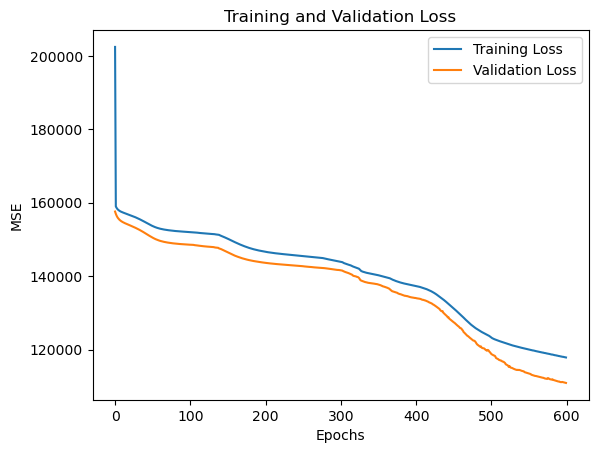

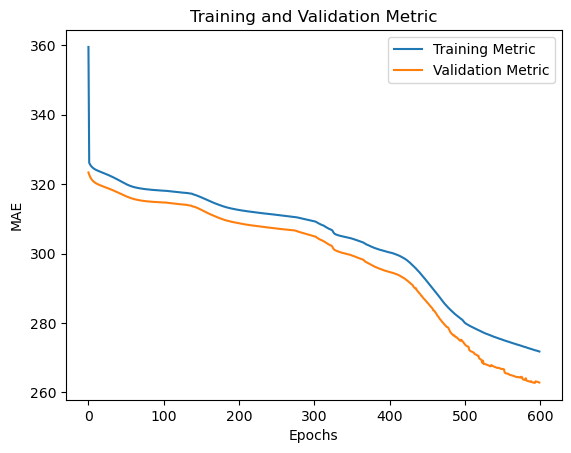

[I 2023-08-18 03:35:57,229] Trial 0 finished with value: 110895.02358449232 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0015780825568978852}. Best is trial 0 with value: 110895.02358449232.


EPOCH 60 - TRAIN MSE LOSS: 60270.45719973949 - VAL MAE METRIC: 195.90292192868938
EPOCH 120 - TRAIN MSE LOSS: 51745.76361343805 - VAL MAE METRIC: 189.36165034444647
EPOCH 180 - TRAIN MSE LOSS: 37241.00508085563 - VAL MAE METRIC: 149.64474705677085
EPOCH 240 - TRAIN MSE LOSS: 33954.17833255534 - VAL MAE METRIC: 143.6317684709477
EPOCH 300 - TRAIN MSE LOSS: 32304.37879386047 - VAL MAE METRIC: 142.95267777081244
EPOCH 360 - TRAIN MSE LOSS: 30937.063644774214 - VAL MAE METRIC: 137.8294503282196
EPOCH 420 - TRAIN MSE LOSS: 29472.10510461939 - VAL MAE METRIC: 133.10458045693787
EPOCH 480 - TRAIN MSE LOSS: 28621.41150333915 - VAL MAE METRIC: 131.53011145694845
EPOCH 540 - TRAIN MSE LOSS: 27815.46868713433 - VAL MAE METRIC: 130.44085913030526
EPOCH 600 - TRAIN MSE LOSS: 27280.299875647645 - VAL MAE METRIC: 128.5219387087704


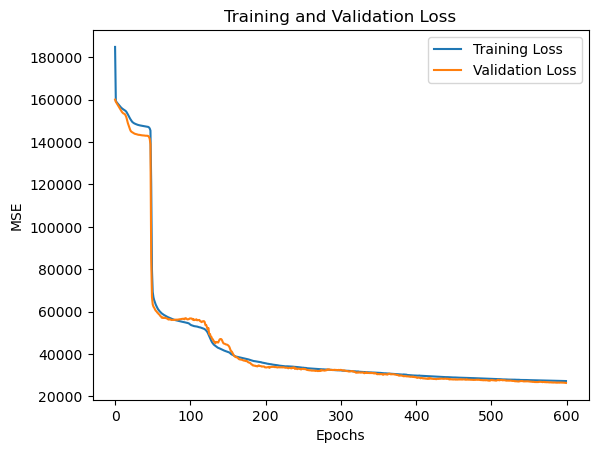

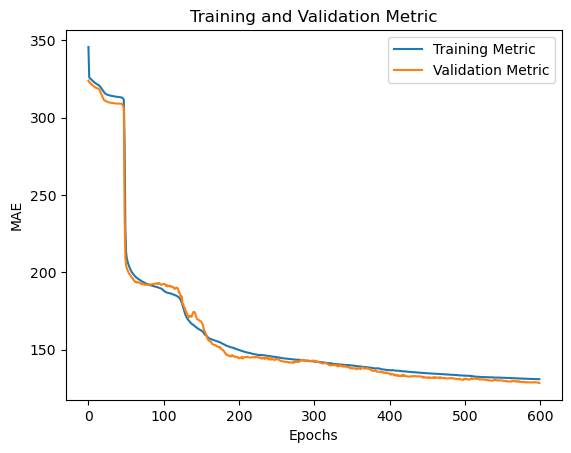

[I 2023-08-18 04:34:31,711] Trial 1 finished with value: 26396.86796417625 and parameters: {'optimizer': 'Adam', 'lr': 0.00996856005798115}. Best is trial 1 with value: 26396.86796417625.


EPOCH 60 - TRAIN MSE LOSS: 155590.42330648823 - VAL MAE METRIC: 318.60346170923907
EPOCH 120 - TRAIN MSE LOSS: 152572.82157627743 - VAL MAE METRIC: 315.701476044824
EPOCH 180 - TRAIN MSE LOSS: 151672.19414482964 - VAL MAE METRIC: 314.78672716622447
EPOCH 240 - TRAIN MSE LOSS: 151338.51235491657 - VAL MAE METRIC: 314.4800404258872
EPOCH 300 - TRAIN MSE LOSS: 150913.62748755503 - VAL MAE METRIC: 314.07480897810734
EPOCH 360 - TRAIN MSE LOSS: 150758.751066163 - VAL MAE METRIC: 313.85039693072804
EPOCH 420 - TRAIN MSE LOSS: 150641.66035810512 - VAL MAE METRIC: 313.68259705644465
EPOCH 480 - TRAIN MSE LOSS: 150533.07219864483 - VAL MAE METRIC: 313.5237983831224
EPOCH 540 - TRAIN MSE LOSS: 150434.57635296282 - VAL MAE METRIC: 313.37993459599284
EPOCH 600 - TRAIN MSE LOSS: 150348.96698491048 - VAL MAE METRIC: 313.2577112823539


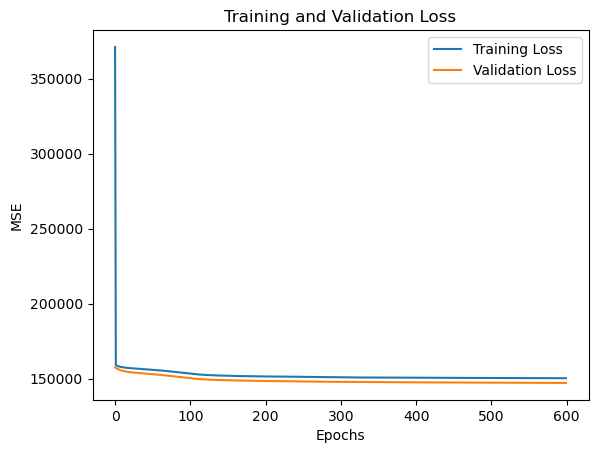

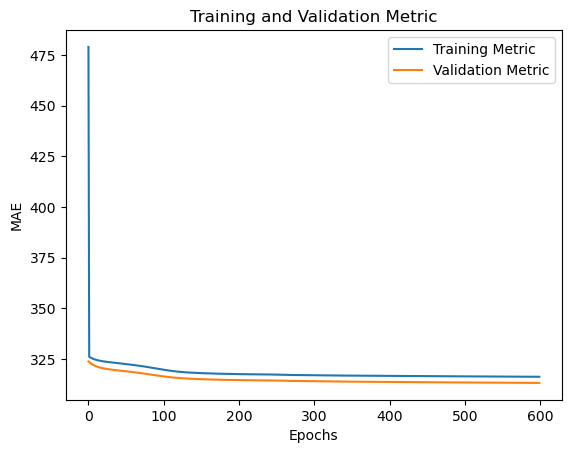

[I 2023-08-18 05:35:08,801] Trial 2 finished with value: 147214.215867043 and parameters: {'optimizer': 'Adam', 'lr': 0.0007852073167256424}. Best is trial 1 with value: 26396.86796417625.


EPOCH 60 - TRAIN MSE LOSS: 159417.47640571577 - VAL MAE METRIC: 324.5380247895205
EPOCH 120 - TRAIN MSE LOSS: 159106.90447421654 - VAL MAE METRIC: 324.1348403165462
EPOCH 180 - TRAIN MSE LOSS: 158837.64817584967 - VAL MAE METRIC: 323.7713038795598
EPOCH 240 - TRAIN MSE LOSS: 158603.1186817733 - VAL MAE METRIC: 323.44242955951336
EPOCH 300 - TRAIN MSE LOSS: 158398.01600020265 - VAL MAE METRIC: 323.14158828351015
EPOCH 360 - TRAIN MSE LOSS: 158218.00146091238 - VAL MAE METRIC: 322.86725693115056
EPOCH 420 - TRAIN MSE LOSS: 158059.46959840987 - VAL MAE METRIC: 322.6179148847121
EPOCH 480 - TRAIN MSE LOSS: 157919.38608528927 - VAL MAE METRIC: 322.3907523903312
EPOCH 540 - TRAIN MSE LOSS: 157795.17068007737 - VAL MAE METRIC: 322.18533041293847
EPOCH 600 - TRAIN MSE LOSS: 157684.54149132522 - VAL MAE METRIC: 321.99673837656326


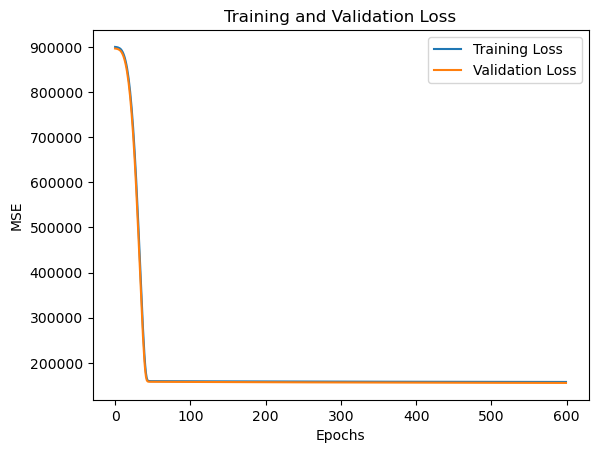

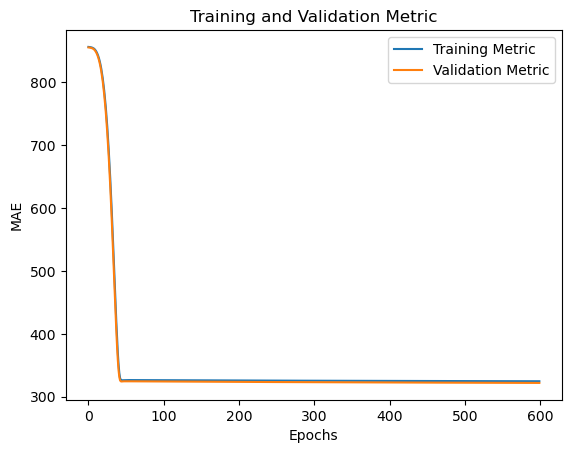

[I 2023-08-18 06:33:45,377] Trial 3 finished with value: 155530.16774191425 and parameters: {'optimizer': 'RMSprop', 'lr': 1.421811645377781e-05}. Best is trial 1 with value: 26396.86796417625.


EPOCH 60 - TRAIN MSE LOSS: 156681.20221514412 - VAL MAE METRIC: 319.85602484372697
EPOCH 120 - TRAIN MSE LOSS: 155388.85475405402 - VAL MAE METRIC: 318.42829514357345
EPOCH 180 - TRAIN MSE LOSS: 153519.30706229483 - VAL MAE METRIC: 316.6052941746658
EPOCH 240 - TRAIN MSE LOSS: 152148.35578126617 - VAL MAE METRIC: 315.305754705623
EPOCH 300 - TRAIN MSE LOSS: 151645.78570752798 - VAL MAE METRIC: 314.81934371771575
EPOCH 360 - TRAIN MSE LOSS: 151357.2753453184 - VAL MAE METRIC: 314.5677380423221
EPOCH 420 - TRAIN MSE LOSS: 151184.39214811363 - VAL MAE METRIC: 314.4497598617443
EPOCH 480 - TRAIN MSE LOSS: 151109.76442341242 - VAL MAE METRIC: 314.41536658344097
EPOCH 540 - TRAIN MSE LOSS: 151064.75927395376 - VAL MAE METRIC: 314.3987833444294
EPOCH 600 - TRAIN MSE LOSS: 151030.399978636 - VAL MAE METRIC: 314.3843258752068


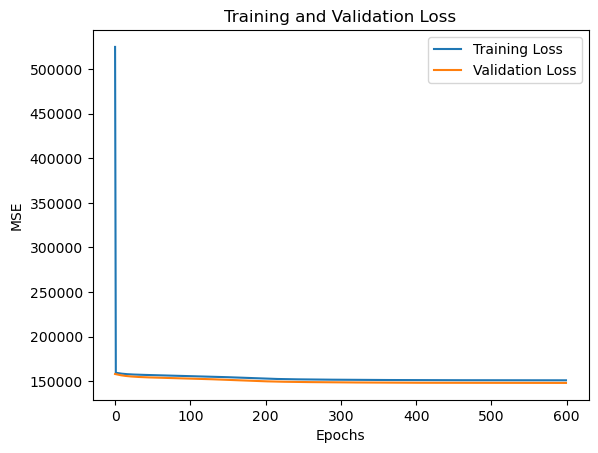

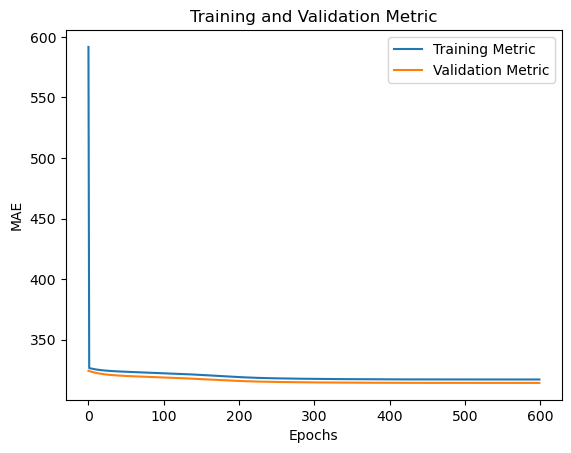

[I 2023-08-18 07:35:14,065] Trial 4 finished with value: 148091.57021396418 and parameters: {'optimizer': 'Adam', 'lr': 0.0004684225152085789}. Best is trial 1 with value: 26396.86796417625.
[I 2023-08-18 07:35:19,776] Trial 5 pruned. 
[I 2023-08-18 07:35:25,550] Trial 6 pruned. 


EPOCH 60 - TRAIN MSE LOSS: 152564.0250442607 - VAL MAE METRIC: 314.4361485730594
EPOCH 120 - TRAIN MSE LOSS: 147395.52250671468 - VAL MAE METRIC: 308.9813537911842
EPOCH 180 - TRAIN MSE LOSS: 145587.56719716577 - VAL MAE METRIC: 306.7572578767604
EPOCH 240 - TRAIN MSE LOSS: 142744.656072966 - VAL MAE METRIC: 302.324048034602
EPOCH 300 - TRAIN MSE LOSS: 139459.37625217534 - VAL MAE METRIC: 296.8782299191025
EPOCH 360 - TRAIN MSE LOSS: 136970.6125189433 - VAL MAE METRIC: 292.9688455625156
EPOCH 420 - TRAIN MSE LOSS: 135143.85226458416 - VAL MAE METRIC: 290.59408675948066
EPOCH 480 - TRAIN MSE LOSS: 133014.53994726483 - VAL MAE METRIC: 287.1495665928866
EPOCH 540 - TRAIN MSE LOSS: 130801.3867878 - VAL MAE METRIC: 283.7936260799341
EPOCH 600 - TRAIN MSE LOSS: 128909.43173388034 - VAL MAE METRIC: 280.64988166211873


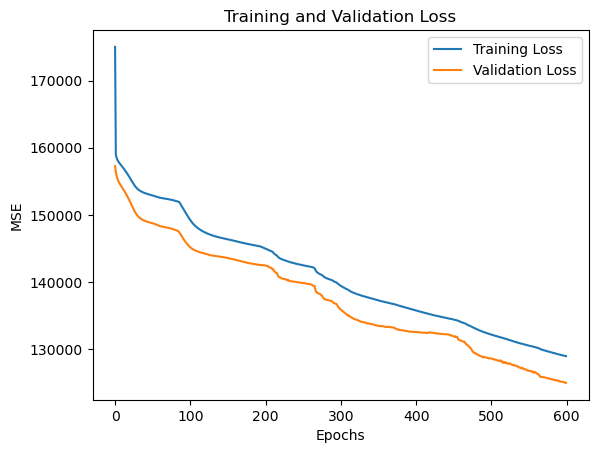

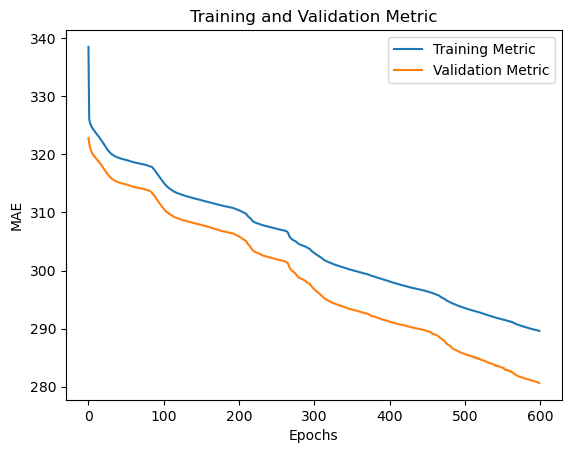

[I 2023-08-18 08:34:38,587] Trial 7 finished with value: 124916.66103564283 and parameters: {'optimizer': 'RMSprop', 'lr': 0.003675895506504017}. Best is trial 1 with value: 26396.86796417625.


EPOCH 60 - TRAIN MSE LOSS: 153937.69144980022 - VAL MAE METRIC: 314.6259334613931
EPOCH 120 - TRAIN MSE LOSS: 153169.69201977004 - VAL MAE METRIC: 314.55229284552286


[I 2023-08-18 08:48:31,950] Trial 8 pruned. 


EPOCH 60 - TRAIN MSE LOSS: 148923.06323289627 - VAL MAE METRIC: 310.13163863224327
EPOCH 120 - TRAIN MSE LOSS: 143271.6297475055 - VAL MAE METRIC: 302.3998057984184
EPOCH 180 - TRAIN MSE LOSS: 54934.80436180553 - VAL MAE METRIC: 191.96182465795204
EPOCH 240 - TRAIN MSE LOSS: 46947.13637488845 - VAL MAE METRIC: 169.09979045289492
EPOCH 300 - TRAIN MSE LOSS: 38475.91660602687 - VAL MAE METRIC: 152.1956003210437
EPOCH 360 - TRAIN MSE LOSS: 33781.715061227645 - VAL MAE METRIC: 141.26317681923985
EPOCH 420 - TRAIN MSE LOSS: 32293.101019471884 - VAL MAE METRIC: 138.32564301370317
EPOCH 480 - TRAIN MSE LOSS: 28968.94310353604 - VAL MAE METRIC: 131.05791747687235
EPOCH 540 - TRAIN MSE LOSS: 27886.76075928599 - VAL MAE METRIC: 128.43619437847187
EPOCH 600 - TRAIN MSE LOSS: 26937.924958204574 - VAL MAE METRIC: 127.2525517451102


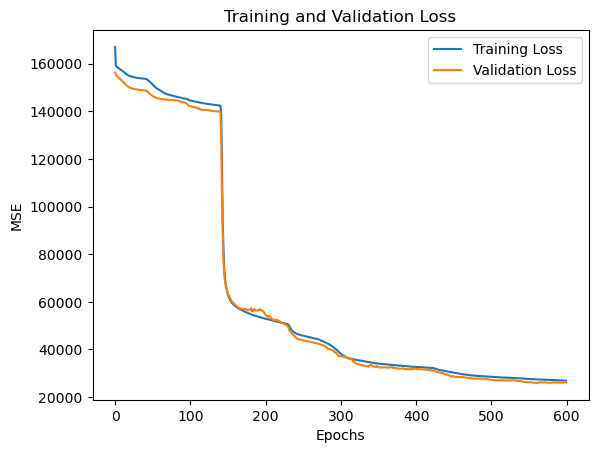

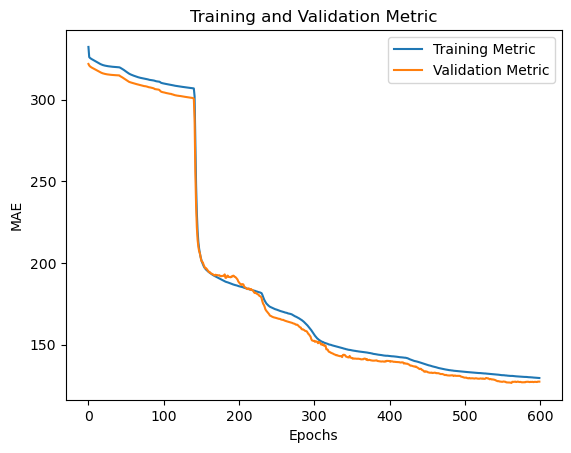

[I 2023-08-18 09:47:23,827] Trial 9 finished with value: 26151.307864255203 and parameters: {'optimizer': 'RMSprop', 'lr': 0.005902282744202855}. Best is trial 9 with value: 26151.307864255203.
[I 2023-08-18 09:47:29,504] Trial 10 pruned. 
[I 2023-08-18 09:47:35,596] Trial 11 pruned. 
[I 2023-08-18 09:47:41,952] Trial 12 pruned. 


EPOCH 60 - TRAIN MSE LOSS: 48774.37264279771 - VAL MAE METRIC: 167.4306542776428
EPOCH 120 - TRAIN MSE LOSS: 41168.269769861625 - VAL MAE METRIC: 152.56347705417733
EPOCH 180 - TRAIN MSE LOSS: 37883.04410971506 - VAL MAE METRIC: 146.38195003477307
EPOCH 240 - TRAIN MSE LOSS: 36387.4473808375 - VAL MAE METRIC: 143.45762816522256
EPOCH 300 - TRAIN MSE LOSS: 35707.71903462175 - VAL MAE METRIC: 142.29540693841952
EPOCH 360 - TRAIN MSE LOSS: 35298.5529495076 - VAL MAE METRIC: 142.44881486217466
EPOCH 420 - TRAIN MSE LOSS: 35146.66343781319 - VAL MAE METRIC: 141.87351832474434
EPOCH 480 - TRAIN MSE LOSS: 34461.06215519714 - VAL MAE METRIC: 140.107020095799
EPOCH 540 - TRAIN MSE LOSS: 34039.871970835266 - VAL MAE METRIC: 139.13384807080726
EPOCH 600 - TRAIN MSE LOSS: 33675.788762268116 - VAL MAE METRIC: 138.38945623199984


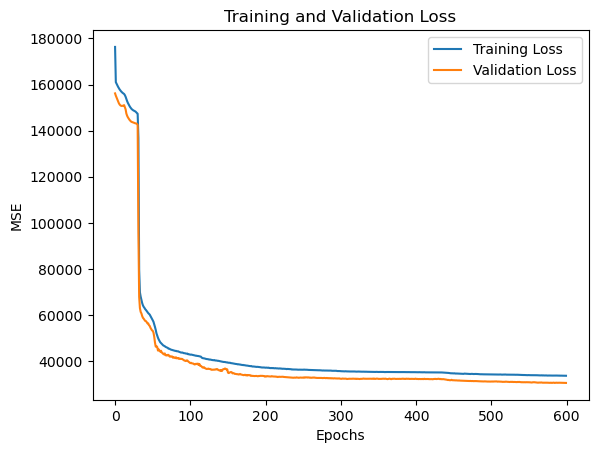

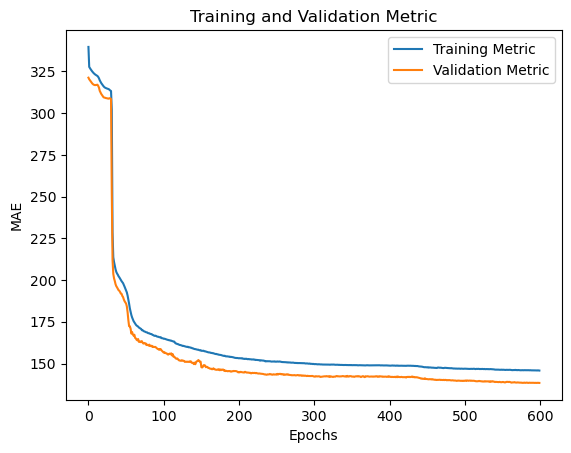

[I 2023-08-18 10:49:43,243] Trial 13 finished with value: 30568.712634604268 and parameters: {'optimizer': 'Adam', 'lr': 0.017414738376305517}. Best is trial 9 with value: 26151.307864255203.


EPOCH 60 - TRAIN MSE LOSS: 148025.77466813012 - VAL MAE METRIC: 309.5958502272552
EPOCH 120 - TRAIN MSE LOSS: 142439.96747415198 - VAL MAE METRIC: 301.05283985713066
EPOCH 180 - TRAIN MSE LOSS: 139662.26712721676 - VAL MAE METRIC: 296.91684740239094
EPOCH 240 - TRAIN MSE LOSS: 134896.4848919857 - VAL MAE METRIC: 289.1150378024936
EPOCH 300 - TRAIN MSE LOSS: 129385.68707062828 - VAL MAE METRIC: 281.76400413308124
EPOCH 360 - TRAIN MSE LOSS: 124907.55766574446 - VAL MAE METRIC: 276.46063741634936
EPOCH 420 - TRAIN MSE LOSS: 51824.344378893504 - VAL MAE METRIC: 185.07369243226856
EPOCH 480 - TRAIN MSE LOSS: 46745.21775003435 - VAL MAE METRIC: 174.88477848953963
EPOCH 540 - TRAIN MSE LOSS: 41918.7992964589 - VAL MAE METRIC: 165.0162810320214
EPOCH 600 - TRAIN MSE LOSS: 35585.50013737273 - VAL MAE METRIC: 147.72415408913207


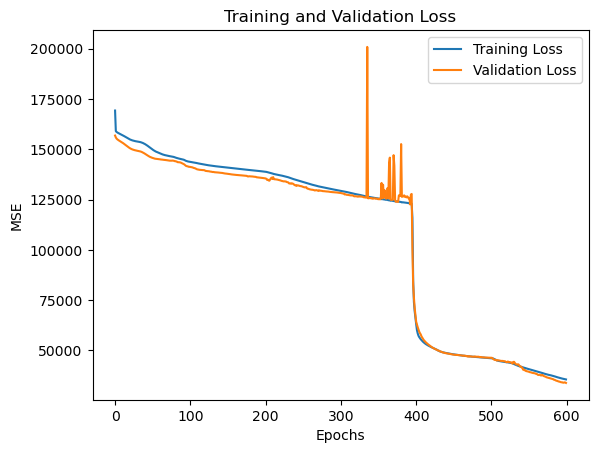

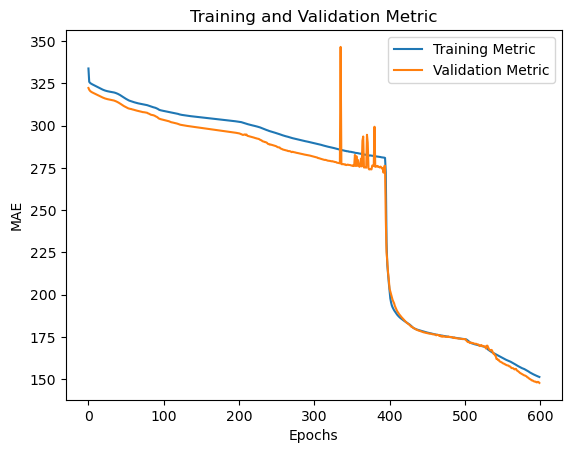

[I 2023-08-18 11:48:56,454] Trial 14 finished with value: 33849.84807516575 and parameters: {'optimizer': 'RMSprop', 'lr': 0.003931199330301762}. Best is trial 9 with value: 26151.307864255203.


EPOCH 60 - TRAIN MSE LOSS: 154998.40416046613 - VAL MAE METRIC: 315.3943407484701


[I 2023-08-18 11:55:47,371] Trial 15 pruned. 
[I 2023-08-18 12:01:21,407] Trial 16 pruned. 
[I 2023-08-18 12:01:27,681] Trial 17 pruned. 


Study statistics: 
  Number of finished trials:  18
  Number of pruned trials:  9
  Number of complete trials:  9
Best trial:
  Value:  26151.307864255203
  Params: 
    optimizer: RMSprop
    lr: 0.005902282744202855


In [39]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials, callbacks=[callback])

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [40]:
# train(1000)

In [41]:
# # Generate a sequence of integers to represent the epoch numbers
# epochs = range(0, len(train_loss))

# # Plot and label the training and validation loss values
# plt.plot(epochs, train_loss, label='Training Loss')
# plt.plot(epochs, validation_loss, label='Validation Loss')

# # Add in a title and axes labels
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
 
# # Display the plot
# plt.legend(loc='best')
# plt.show()

In [42]:
model = best_model
model.load_state_dict(torch.load('/kaggle/working/best_model_weights.pth'))
mae = torch.nn.L1Loss()

# Test with edge_weight

In [43]:
def test(linkloader):
    out = []
    label = []
    test_losses = 0
    test_metrics = 0
    cnt = 0

    model.eval()
    for loader in linkloader:
        for data in loader:
            data = data.to(device)

            pred = model(data.x, data.edge_index, data.edge_weight, data.edge_label_index)
            target = data.edge_label
            pred = pred.to(torch.double)
            target = target.to(torch.double)
            out.append(pred)
            label.append(target)
            loss = F.mse_loss(pred, target)
            metric = mae(pred, target)
            test_losses += loss
            test_metrics += metric
            cnt += 1

    avg_test_loss = test_losses/cnt
    avg_test_metric = test_metrics/cnt
    
    print("MSE LOSS: " + str(avg_test_loss))
    print("MAE METRIC: " + str(avg_test_metric))
    
    return out, label

# Test without edge_weight

In [44]:
# def test(linkloader):
#     out = []
#     label = []
#     test_losses = 0
#     test_metrics = 0
#     cnt = 0

#     model.eval()
#     for loader in linkloader:
#         for data in loader:
#             data = data.to(device)

#             pred = model(data.x, data.edge_index, data.edge_label_index)
#             target = data.edge_label
#             pred = pred.to(torch.double)
#             target = target.to(torch.double)
#             out.append(pred)
#             label.append(target)
#             loss = F.mse_loss(pred, target)
#             metric = mae(pred, target)
#             test_losses += loss
#             test_metrics += metric
#             cnt += 1

#     avg_test_loss = test_losses/cnt
#     avg_test_metric = test_metrics/cnt
    
#     print("MSE LOSS: " + str(avg_test_loss))
#     print("MAE METRIC: " + str(avg_test_metric))
    
#     return out, label

# Training Positioning

In [45]:
pred, label = test(train_linkloader_list)

MSE LOSS: tensor(24945.7855, dtype=torch.float64, grad_fn=<DivBackward0>)
MAE METRIC: tensor(124.1141, dtype=torch.float64, grad_fn=<DivBackward0>)


In [46]:
import localization as lx

pred_x = []
pred_y = []
for i in range(len(pred)):
    P=lx.Project(mode='2D',solver='LSE')

    for num, j in enumerate(rp_boundaries):
        anchor = str(num)
        coord = (rp_coord['x'][j], rp_coord['y'][j])
        P.add_anchor(anchor, coord)
        
    t,label=P.add_target()
    
    for j in range(len(rp_boundaries)):
        anchor = str(j)
        dist = pred[i][j]
        t.add_measure(anchor, dist)
        
    P.solve()
    
    pred_x.append(t.loc.x)
    pred_y.append(t.loc.y)
    
test_df = pd.DataFrame(list(zip(pred_x, pred_y)),columns =['Pred X', 'Pred Y'])
test_df['X'] = X_train['X']
test_df['Y'] = X_train['Y']
test_df['PE'] = euc(test_df['Pred X'], test_df['Pred Y'], test_df['X'], test_df['Y'])
print(test_df)
print("MPE = " + str(test_df['PE'].mean()))

LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocat

# Validation Positioning

In [47]:
pred, label = test(val_linkloader_list)

MSE LOSS: tensor(25966.4747, dtype=torch.float64, grad_fn=<DivBackward0>)
MAE METRIC: tensor(126.4660, dtype=torch.float64, grad_fn=<DivBackward0>)


In [48]:
import localization as lx

pred_x = []
pred_y = []
for i in range(len(pred)):
    P=lx.Project(mode='2D',solver='LSE')

    for num, j in enumerate(rp_boundaries):
        anchor = str(num)
        coord = (rp_coord['x'][j], rp_coord['y'][j])
        P.add_anchor(anchor, coord)
        
    t,label=P.add_target()
    
    for j in range(len(rp_boundaries)):
        anchor = str(j)
        dist = pred[i][j]
        t.add_measure(anchor, dist)
        
    P.solve()
    
    pred_x.append(t.loc.x)
    pred_y.append(t.loc.y)
    
test_df = pd.DataFrame(list(zip(pred_x, pred_y)),columns =['Pred X', 'Pred Y'])
test_df['X'] = X_val['X']
test_df['Y'] = X_val['Y']
test_df['PE'] = euc(test_df['Pred X'], test_df['Pred Y'], test_df['X'], test_df['Y'])
print(test_df)
print("MPE = " + str(test_df['PE'].mean()))

LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocat

# Test Positioning

In [49]:
pred, label = test(test_linkloader_list)

MSE LOSS: tensor(25347.2244, dtype=torch.float64, grad_fn=<DivBackward0>)
MAE METRIC: tensor(125.2257, dtype=torch.float64, grad_fn=<DivBackward0>)


In [50]:
import localization as lx

pred_x = []
pred_y = []
for i in range(len(pred)):
    P=lx.Project(mode='2D',solver='LSE')

    for num, j in enumerate(rp_boundaries):
        anchor = str(num)
        coord = (rp_coord['x'][j], rp_coord['y'][j])
        P.add_anchor(anchor, coord)
        
    t,label=P.add_target()
    
    for j in range(len(rp_boundaries)):
        anchor = str(j)
        dist = pred[i][j]
        t.add_measure(anchor, dist)
        
    P.solve()
    
    pred_x.append(t.loc.x)
    pred_y.append(t.loc.y)
    
test_df = pd.DataFrame(list(zip(pred_x, pred_y)),columns =['Pred X', 'Pred Y'])
test_df['X'] = X_test['X']
test_df['Y'] = X_test['Y']
test_df['PE'] = euc(test_df['Pred X'], test_df['Pred Y'], test_df['X'], test_df['Y'])
print(test_df)
print("MPE = " + str(test_df['PE'].mean()))

LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocating...
LSE Geolocat